In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('D:/M2_datasets/Serie_chrono/Projet/youtube/FR_youtube_trending_data.csv')                                             # Ordi Kévin
#data = pd.read_csv('/users/2023/ds2/118003905/Téléchargements/FR_youtube_trending_data.csv')     # Ordi Salle i008

In [3]:
df = data[['publishedAt']].copy()
df['publishedAt'] = df['publishedAt'].apply(lambda x: x[:10])
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169190 entries, 0 to 169189
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   publishedAt  169190 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


### Période: 2020/08/10 à 2021/04/01

               0
publishedAt     
2020-08-11   175
2020-08-12   224
2020-08-13   210
2020-08-14   291
2020-08-15   121


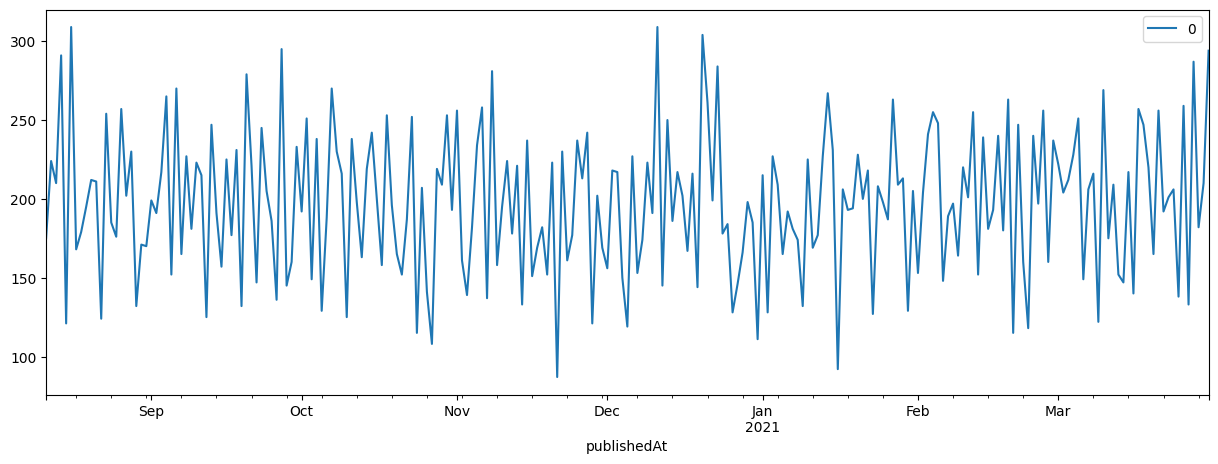

In [12]:
df_new = df[(df['publishedAt'] > '2020-08-10') & (df['publishedAt'] < '2021-04-01')].groupby('publishedAt').size()
df_new = pd.DataFrame(df_new)
df_new.plot(figsize=(15,5))
print(df_new.head(5))
plt.show()
df_new.to_csv("export_nb_par_jour_20200811_to_2021031.csv")

Log

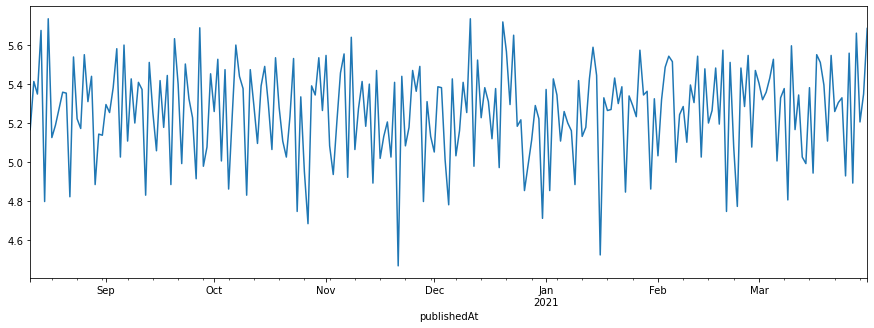

In [26]:
df_new['log'] = df_new[0].apply(lambda x : np.log(x))
df_new['log'].plot(figsize = (15,5))
plt.show()

### Période 2021/08/10 à 2022/08/10

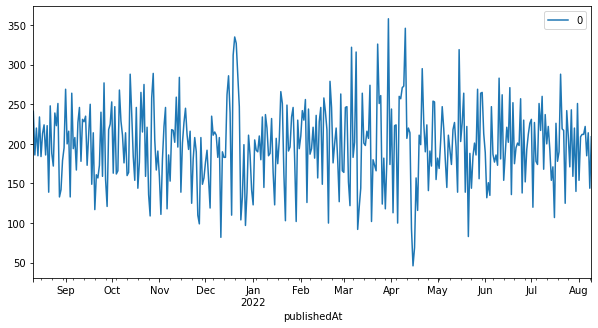

In [35]:
df_new2 = df[(df['publishedAt'] > '2021-08-10') & (df['publishedAt'] < '2022-08-10')].groupby('publishedAt').size()
df_new2 = pd.DataFrame(df_new2)
df_new2.plot(figsize=(10,5))
plt.show()

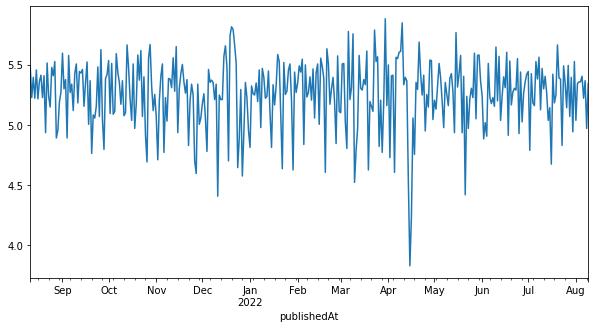

In [36]:
df_new2['log'] = df_new2[0].apply(lambda x : np.log(x))
df_new2['log'].plot(figsize = (10,5))
plt.show()

### Période en semaine

  publishedAt       week
0  2020-08-11 2020-08-08
1  2020-08-11 2020-08-08
2  2020-08-12 2020-08-08
3  2020-08-11 2020-08-08
4  2020-08-12 2020-08-08
            publishedAt
week                   
2020-08-01           49
2020-08-08         1188
2020-08-15         1395
2020-08-22         1428
2020-08-29          473


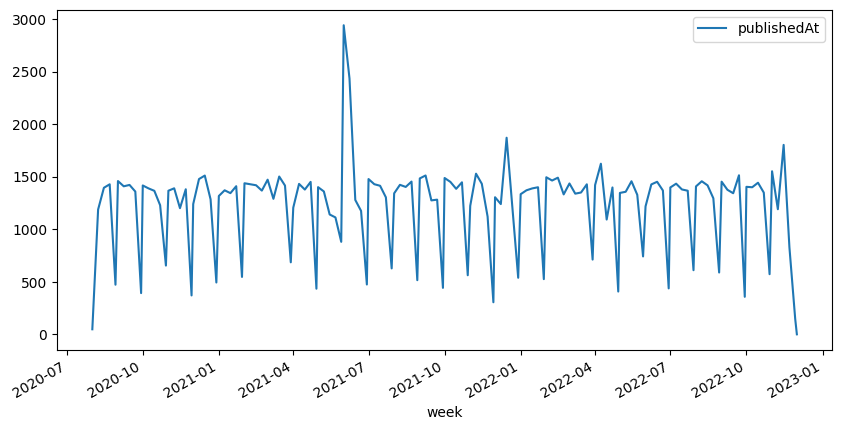

In [10]:
df['week'] = df['publishedAt'] - pd.to_timedelta((df['publishedAt'].dt.day - 1) % 7, unit='d')
print(df.head(5))
df_week = df.groupby('week').count()
print(df_week.head(5))
df_week.plot(figsize=(10,5))
df_week.to_csv("export_nb_par_semaine.csv")


### Tous les jours

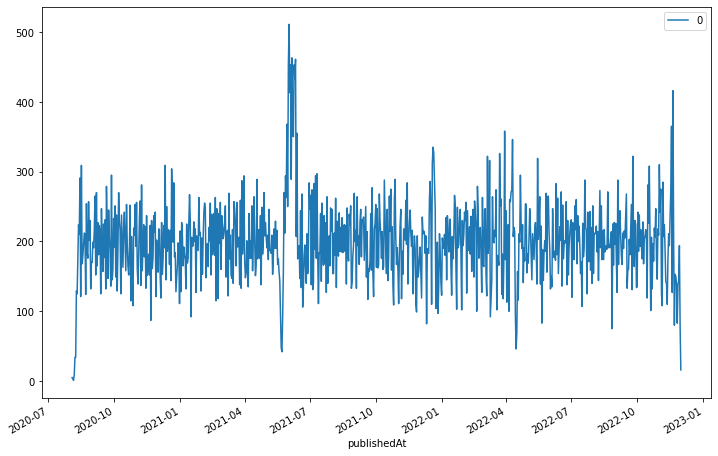

In [37]:
df1 = df.groupby('publishedAt').size()
df1 = pd.DataFrame(df1)
df1.plot(figsize=(12,8))
plt.show()

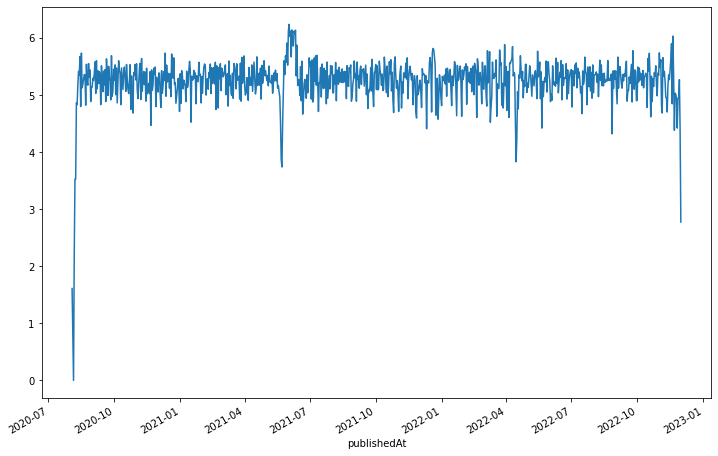

In [38]:
df1['log'] = df1[0].apply(lambda x : np.log(x))
df1['log'].plot(figsize = (12,8))
plt.show()